# Predicting housing prices in King County

In this project, we are going to use the king county housing prices dataset to try to predict the housing prices in king county, Washington state, USA. The dataset is from https://www.kaggle.com/datasets/harlfoxem/housesalesprediction. The project starts by having some EDA, where plots are created to show the releationship between the different columns. Further, outliers are located and removed. In addition are new columns created such that the dataset fits better into the machine learning algorithms which are going to be used for giving an accurate prediction as possible. 

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
import warnings
warnings.filterwarnings('ignore')

In [111]:
data = pd.read_csv('kc_house_data.csv')
display(data.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Description of the columns in the dataset**

- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

source: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/discussion/207885

**Summary statistics**

Generated  descriptive statistics that include those that summarize the central tendency, dispersion and shape of a dataset’s distribution

In [96]:
display(data.describe().drop(['id', 'price', 'zipcode'], axis=1))

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


Now, let's see how the price varies in the dataset, and some statistics on the feature.

In [97]:
display((data['price'].describe()).to_frame())

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


Does the data contain null values?

In [98]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Seems like the data is in fact complete without null values. 

## A further look at the data

**Timeframe of the data**

In [112]:
earliest_data, latest_data = data['date'].min(), data['date'].max()

print('Earliest date: ', earliest_data)
print('Latest date: ', latest_data)

Earliest date:  20140502T000000
Latest date:  20150527T000000


One can see that the data was collected between 2nd of February 2014, and 27th of May 2015. We remove the meaningless part of the date (time which is always set to midnight). 

In [113]:
data['date'] = data.apply(lambda x: x.date[0:8], axis=1)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We can add a new column named 'age' based on the sale of the house and the year built.

In [114]:
data['age'] = data.apply(lambda x: int(x.date[0:4]) - x.yr_built, axis=1)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28


Now, let's take a look at the price column. Let's plot it.

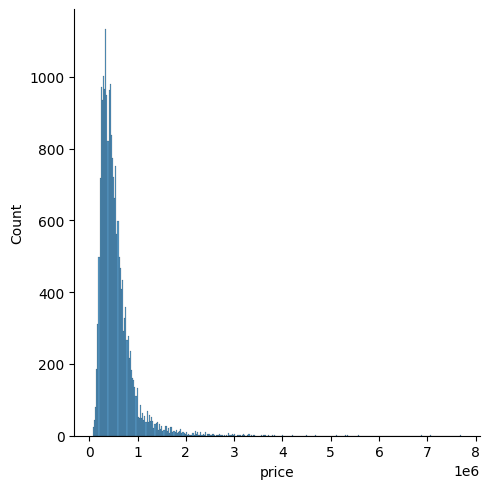

In [115]:
sns.displot(data['price'])

By looking at the price column, we observe that there prices are not ideally distributed, and we should probably transform it. 

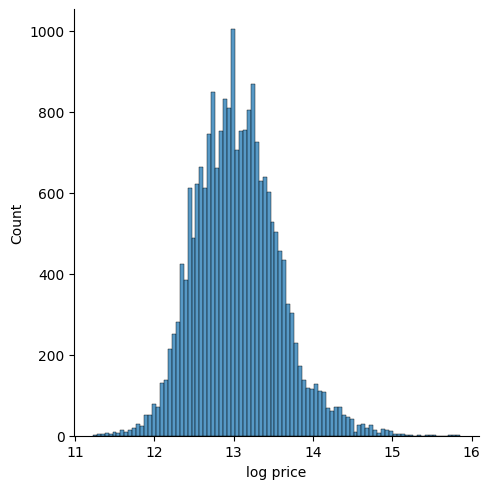

In [116]:
data['log price'] = data['price'].apply(lambda x: np.log(x))
sns.displot(data['log price'])

Taking the log of the values seems like a good idea. In this way, it is more convinient to use this column in our prediction model in part 2 of the project. It would also be ideal to add a feature that describes the price per square foot. Let's look at it's distribution

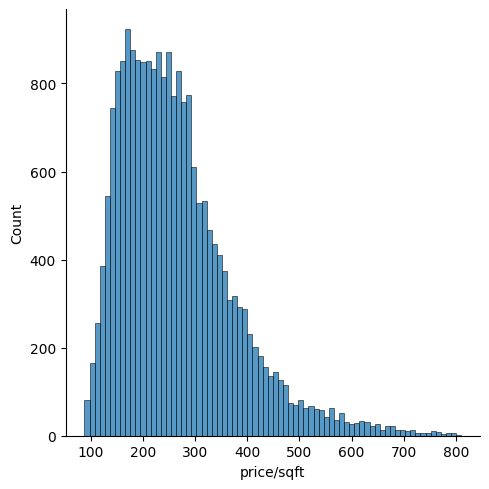

In [117]:
data['price/sqft']= data['price'] / data['sqft_living']
sns.displot(data['price/sqft'])

Let's also transform this value into its root

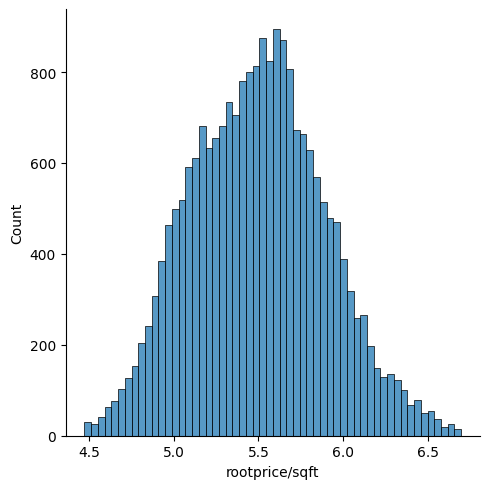

In [118]:
data['rootprice/sqft'] = data['price/sqft'].apply(lambda x: np.log(x))
sns.displot(data['rootprice/sqft'])

Taking a look at the bedroom feature, one can see that there are some outliers.

,Number of houses
Bedrooms,
3,9824
2,2760
4,6882
5,1601
1,199
6,272
7,38
0,13
8,13


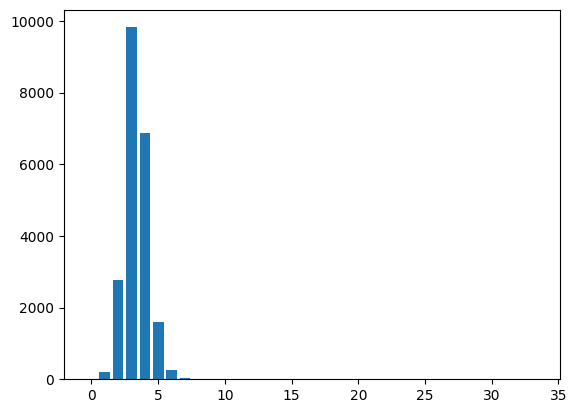

In [119]:

bedroom_unique_values = data['bedrooms'].unique()

def houses_by_bedrooms(df, n_bedrooms):
    return df[df['bedrooms']==n_bedrooms]['id'].count()

n_houses_by_bedrooms = {}
for bedroom in bedroom_unique_values:
    n_houses = houses_by_bedrooms(data, bedroom)
    n_houses_by_bedrooms[bedroom] = n_houses
plt.bar(list(n_houses_by_bedrooms.keys()), list(n_houses_by_bedrooms.values()))
display(pd.DataFrame(n_houses_by_bedrooms.items(), columns=['Bedrooms', 'Number of houses']).set_index('Bedrooms'))


So we do indeed have a few outliers. Let's remove them. But first, let's look at the price distribution for each unique value of bedrooms.

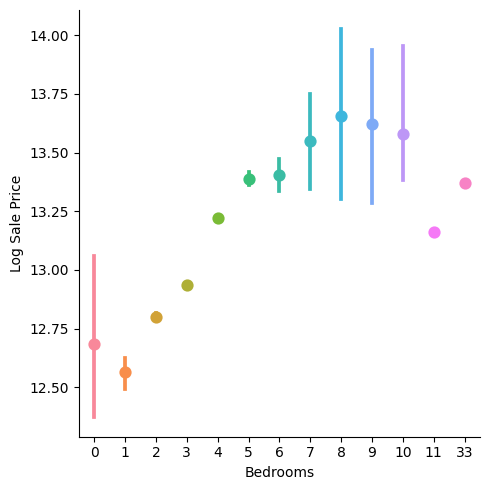

In [120]:
def price_bedroom(dataframe):
    df = pd.DataFrame()
    df['Log Sale Price']= dataframe['log price']
    df['Bedrooms'] = dataframe['bedrooms']
    df['Bedrooms'] = dataframe['bedrooms'].apply(lambda x: int(x))
    ax = sns.catplot(x="Bedrooms", y="Log Sale Price", hue='Bedrooms', data=df, kind="point")
    plt.show()

price_bedroom(data)

Seems like capping the number of bedrooms between 1 and 7 seems like a good idea. The other feature values don't look very predictive of the price. We also don't remove too many values this way.

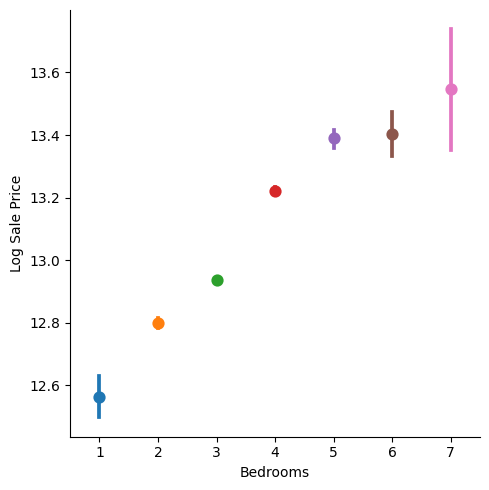

In [121]:
data = data[(data['bedrooms'] < 8) & (data['bedrooms'] > 0)] 
price_bedroom(data)

Now, let's take a look at the neighbourhoods are houses are in. 

In [122]:
num_neighborhoods = len(pd.unique(data['zipcode']))
num_neighborhoods

70

There are 70 unique neighbourhoods 

In [123]:
top_20 = data['zipcode'].value_counts(ascending=False).to_frame().head(20)
display(top_20)
in_top_20_neighborhoods = data.join(top_20, on='zipcode', rsuffix='s').dropna()
in_top_20_neighborhoods = in_top_20_neighborhoods.drop(columns=['zipcode'])
print("Number of houses in top 20 neighbourhoods:", len(in_top_20_neighborhoods))

,zipcode
98103,600
98038,589
98115,583
98052,574
98117,553
98042,547
98034,544
98118,507
98023,499
98006,497


Number of houses in top 20 neighbourhoods: 9857


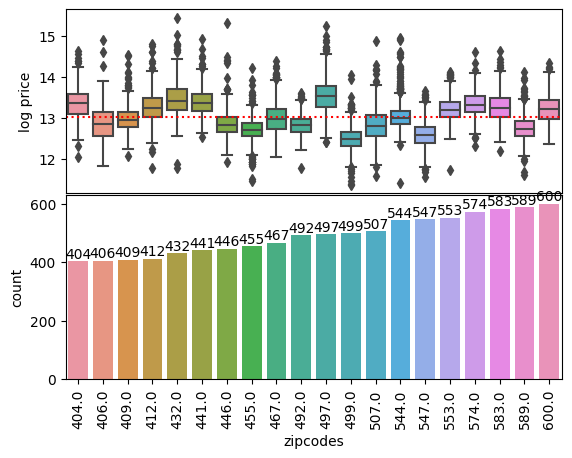

In [124]:
def plot_categorical(neighborhoods):
    fig, axs = plt.subplots(nrows=2)

    sns.boxplot(
        x='zipcodes',
        y='log price',
        data=neighborhoods,
        ax=axs[0],
    )

    sns.countplot(
        x='zipcodes',
        data=neighborhoods,
        ax=axs[1],
    )

    # Draw median price
    axs[0].axhline(
        y=data['log price'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.01)
plot_categorical(neighborhoods=in_top_20_neighborhoods)

We can see that the zipcodes have some price variety in each one, let's find the most expensive zip codes.

In [125]:
def find_expensive_neighborhoods(data, n=3, metric=np.median):
    neighborhoods = data.groupby('zipcode').median().sort_values('log price', ascending=False).index[:n]
    # This makes sure the final list contains the generic int type used in Python3, not specific ones used in numpy.
    return [int(code) for code in neighborhoods]

expensive_neighborhoods = find_expensive_neighborhoods(data, 3, np.median)
expensive_neighborhoods

[98039, 98004, 98040]

In [126]:
def add_in_expensive_neighborhood(data, neighborhoods):
    data['in_expensive_neighborhood'] = data['zipcode'].isin(neighborhoods).astype(int)
    return data

expensive_neighborhoods = find_expensive_neighborhoods(data, 3, np.median)
training_data = add_in_expensive_neighborhood(data, expensive_neighborhoods)
training_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,age,log price,price/sqft,rootprice/sqft,in_expensive_neighborhood
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,59,12.309982,188.050847,5.236712,0
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,63,13.195614,209.338521,5.343953,0
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,82,12.100712,233.766234,5.454322,0
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,49,13.311329,308.163265,5.730630,0
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,28,13.142166,303.571429,5.715617,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,98103,47.6993,-122.346,1530,1509,5,12.793859,235.294118,5.460836,0
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,98146,47.5107,-122.362,1830,7200,1,12.899220,173.160173,5.154217,0
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,98144,47.5944,-122.299,1020,2007,5,12.904459,394.216667,5.976901,0
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,98027,47.5345,-122.069,1410,1287,11,12.899220,250.000000,5.521461,0
